# Exercise 6

In [1]:
%pylab inline
import cv2
import scipy.ndimage
import skimage.util
import matplotlib.cm as cm

Populating the interactive namespace from numpy and matplotlib


## Image Sharpening

The first part will be to sharpen an image. One theory is to use a unsharpening mask.

Load the face-image as grayscale image and smooth it with a gaussian filter.

In [2]:
face = scipy.misc.face()
img = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

In [4]:
avg = cv2.GaussianBlur(img, (17,17), 20.0)

Subtract the filtered image from the original image (Convert the original image to float first).

In [5]:
diff1 = (1.0 * img - avg) 

Set small absolute differences to zero, smaller than 20 to zero to minimize artifacts.

In [6]:
theta = 20
diff2 = np.where(np.abs(diff1) > theta, diff1, 0) 

Plot the four derived images.

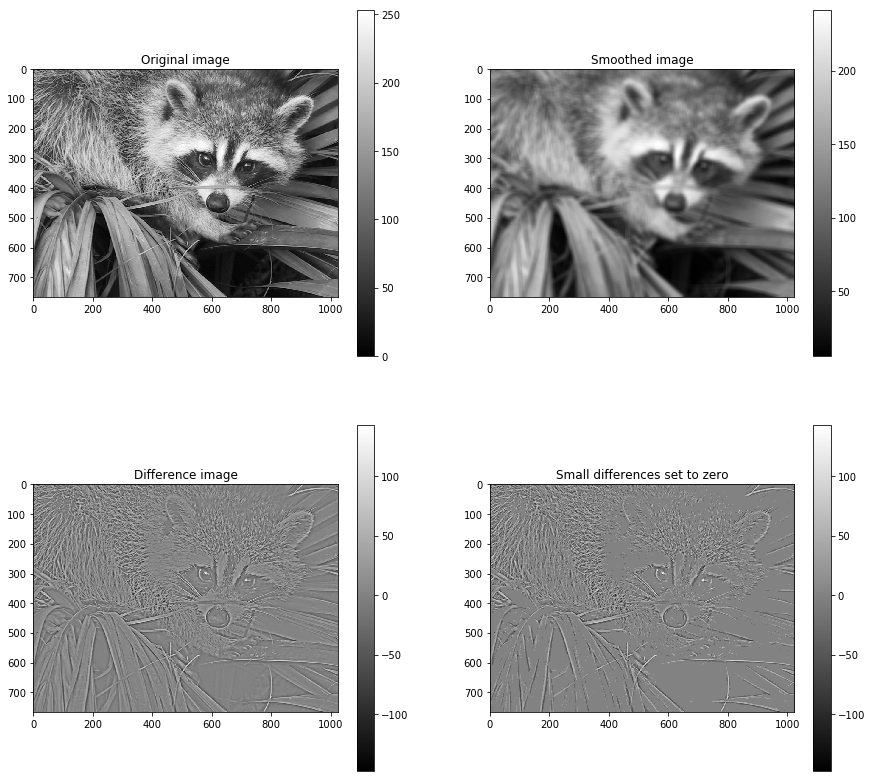

In [7]:
figure(figsize(15, 14))
plt.subplot(2, 2, 1), plt.imshow(img, 'gray')
plt.title('Original image'), plt.colorbar()
plt.subplot(2, 2, 2), plt.imshow(avg, 'gray')
plt.title('Smoothed image'), plt.colorbar()
plt.subplot(2, 2, 3), plt.imshow(diff1, 'gray')
plt.title('Difference image'), plt.colorbar()
plt.subplot(2, 2, 4), plt.imshow(diff2, 'gray')
plt.title('Small differences set to zero'), plt.colorbar();

### Unsharp mask

Create a mask image by setting values of the difference image, that are greater than the threshold, to '255' and the rest to '0'. 

In [8]:
mask = np.where(diff1 > theta, 255, 0)

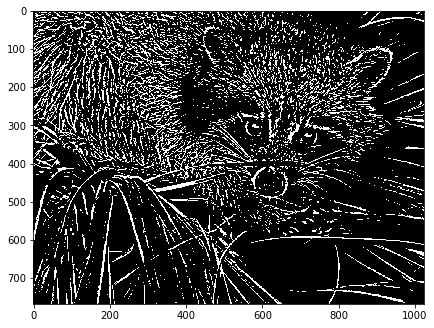

In [9]:
figure(figsize(7, 7))
plt.imshow(mask, 'gray');

## Sharpening images

We sharpen the image now by adding the unsharp image multiplicated with a factor $c$ to the original image. We also need to clip the image to the area of $[0,255]$.

In [12]:
c = .9
sharpened = img + c * diff2

sharpened = np.where(sharpened > 255, 255, sharpened)
sharpened = np.where(sharpened < 0, 0, sharpened)

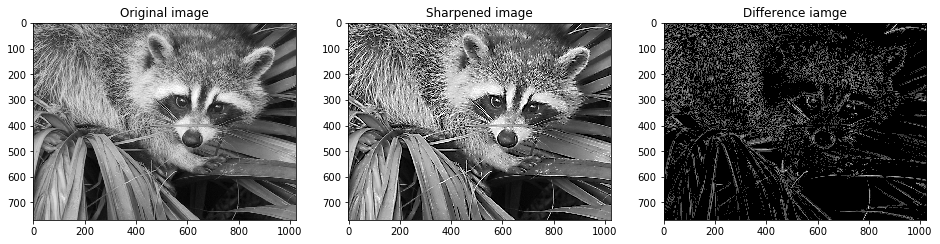

In [14]:
figure(figsize(16, 7))
plt.subplot(1, 3, 1), plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2), plt.imshow(sharpened, 'gray')
plt.title('Sharpened image')
plt.subplot(1, 3, 3), plt.imshow(np.abs(sharpened-img), 'gray')
plt.title('Difference iamge')

## Edge detection

### LaPlace Filter

One popular image enhancement method is combining an image with its Laplacian-filtered image. 

Load 'moon.jpg' from the website. 

We want to allow negative image values for later calculations, so we have to switch to float values and we also have to adjust the values to the range of $[0,1]$.


In [40]:
img = cv2.imread('moon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img.astype(float)
img /= 255.0

Create a Laplacian filtered version of the image.

Create a 2-D array

$$\begin{pmatrix} 1 & 1 & 1 \\ 1 & -8 & 1 \\ 1 & 1 & 1  \end{pmatrix} $$

which denotes the filter kernel. Apply it to the image using cv2.filter2D().

In [41]:
filterKernel = np.asarray([[1, 1.0, 1], [1.0, -8.0, 1.0], [1, 1.0, 1]])

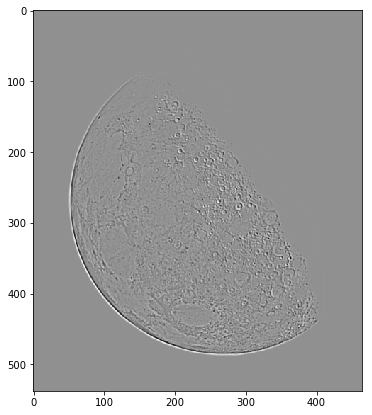

In [42]:
imgFiltered = cv2.filter2D(img, -1, filterKernel)
plt.imshow(imgFiltered,'gray')

Create a sharpened image by subtracting the Laplacian image from the original. Plot the three images next to each other.

In [43]:
img2 = img - imgFiltered

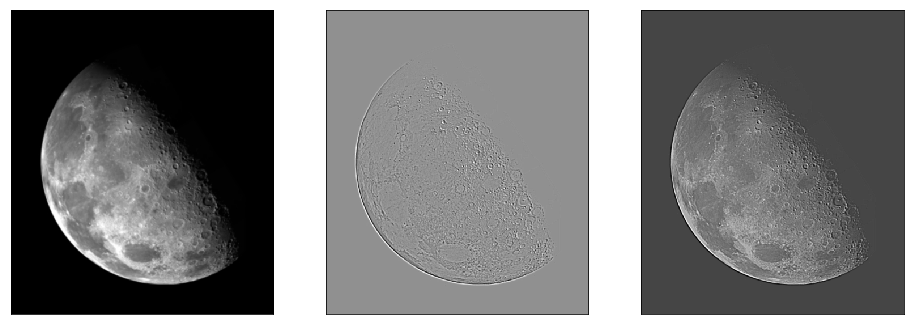

In [44]:
plt.subplot(1,3,1)
plt.xticks([]),plt.yticks([])
plt.imshow(img,'gray')
plt.subplot(1,3,2)
plt.xticks([]),plt.yticks([])
plt.imshow(imgFiltered,'gray')
plt.subplot(1,3,3)
plt.xticks([]),plt.yticks([])
plt.imshow(img2,'gray')


There's also a predefined Laplacian-operator. Implement and plot it (cv2.Laplacian)

In [45]:
cvLaPlaceImg = cv2.Laplacian(img, -1)
sharpened = img - cvLaPlaceImg

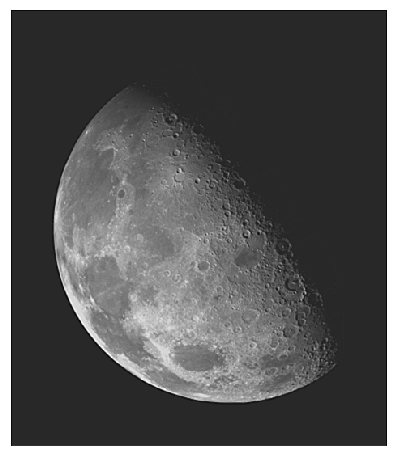

In [46]:
figure(figsize(8, 8))
plt.xticks([]),plt.yticks([])
plt.imshow(sharpened, 'gray');

### Sobel Filter

Implement the sobel filter in x- and y-direction with k=3 and plot the output. Use cv2.sobel().

In [47]:
k = 5
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=k)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=k)

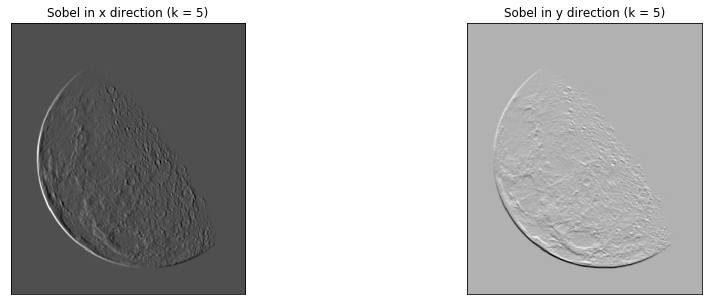

In [48]:
figure(figsize(15,5))
plt.subplot(1, 2, 1), plt.imshow(sobelx, 'gray')
plt.title('Sobel in x direction (k = {0})'.format(k))
plt.xticks([]),plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(sobely, 'gray')
plt.xticks([]),plt.yticks([])
plt.title('Sobel in y direction (k = {0})'.format(k));

Now, square both directions and take the square root of their addition to get the sobel filtered image. Plot the output.

In [49]:
sobel = np.sqrt(sobelx**2 + sobely**2)

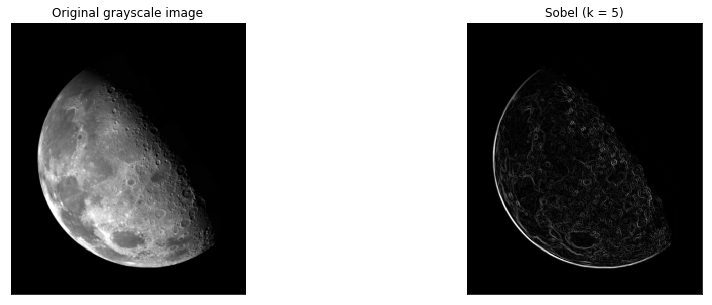

In [50]:
figure(figsize(15,5))
plt.subplot(1, 2, 1), plt.imshow(img, 'gray')
plt.xticks([]),plt.yticks([])
plt.title('Original grayscale image')
plt.subplot(1, 2, 2), plt.imshow(sobel, 'gray')
plt.xticks([]),plt.yticks([])
plt.title('Sobel (k = {0})'.format(k));

### Canny edge detector

Implement the canny edge detector provided by OpenCV (cv2.canny) and plot the output.

In [56]:
img = cv2.imread('moon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.uint8(img)

canny = cv2.Canny(img,150,200)

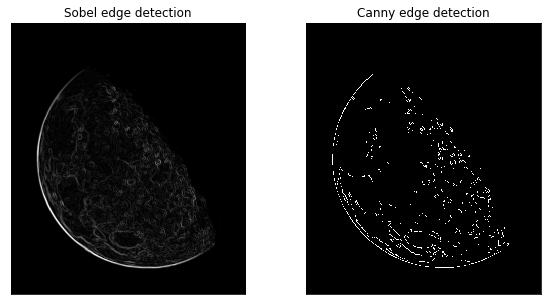

In [57]:
figure(figsize(15,5))
plt.subplot(1, 3, 2), plt.imshow(sobel, 'gray')
plt.xticks([]),plt.yticks([])
plt.title('Sobel edge detection');
plt.subplot(1, 3, 3), plt.imshow(canny, 'gray')
plt.xticks([]),plt.yticks([])
plt.title('Canny edge detection');